In [1]:
import sympy as sm

In [2]:
sm.init_printing()  # improves symbolic math display

In [3]:
mb, mc, Ib, Ic, r, l, d, g = sm.symbols('m_b, m_c, I_b, I_c, r, l, d, g')

In [4]:
mb

In [5]:
Ib

In [6]:
r+Ib**2

In [7]:
sm.sin(r) + sm.sqrt(mb)

In [8]:
t = sm.symbols('t')

In [9]:
theta = sm.Function('theta')(t)
theta

In [10]:
omega = sm.Function('omega')(t)
omega

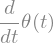

In [11]:
sm.diff(theta, t)

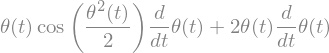

In [12]:
sm.diff(theta**2+sm.sin(theta**2/2), t)

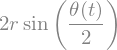

In [13]:
d = 2*r*sm.sin(theta/2)
d

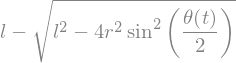

In [14]:
h = l - sm.sqrt(l**2 - d**2)
h

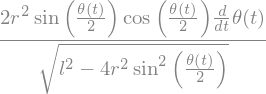

In [15]:
v = sm.diff(h, t)
v

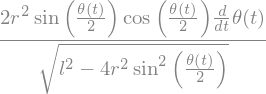

In [16]:
v = h.diff(t)
v

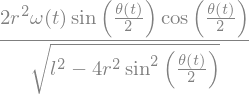

In [17]:
v = v.subs({theta.diff(t): omega})
v

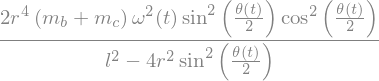

In [18]:
T = (mb + mc)*v**2/2
T

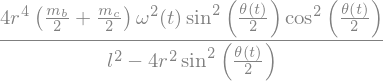

In [19]:
sm.S(1)/2*(mb+mc)*v**2

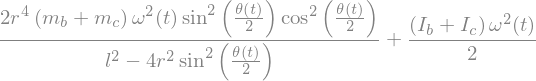

In [20]:
T = (mb + mc)*v**2/2 + (Ib + Ic)*omega**2/2 # no time dervitives!!
T

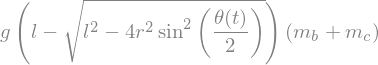

In [21]:
U = (mb + mc)*g*h  # no time derivatives
U

In [22]:
L = T - U

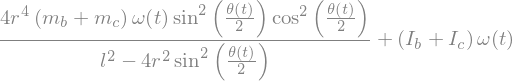

In [23]:
L.diff(omega)

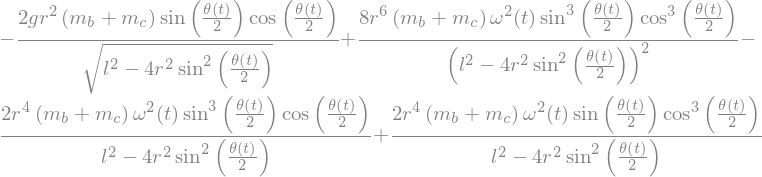

In [24]:
L.diff(theta)

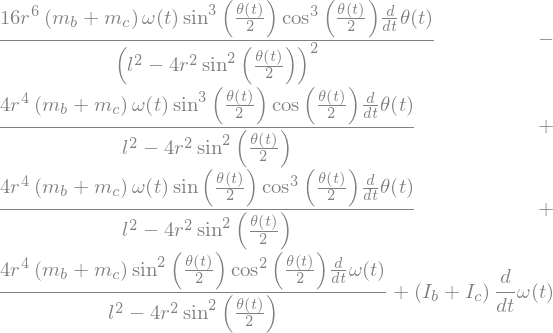

In [25]:
L.diff(omega).diff(t)

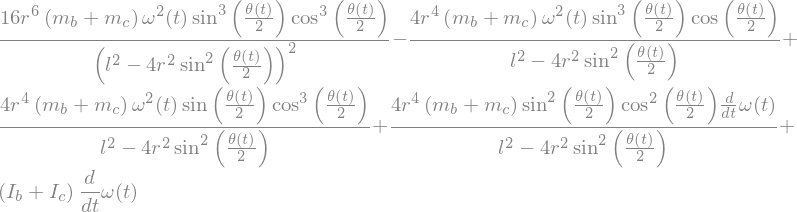

In [26]:
L.diff(omega).diff(t).subs({theta.diff(t): omega})

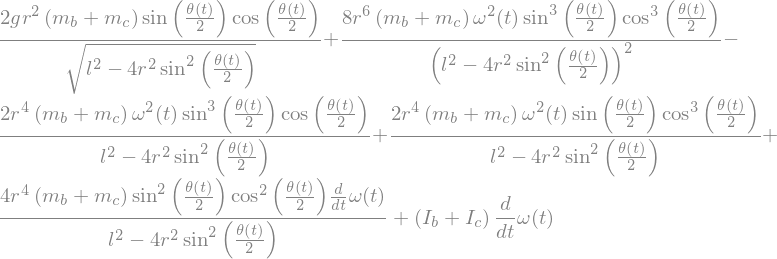

In [27]:
f = L.diff(omega).diff(t).subs({theta.diff(t): omega}) - L.diff(theta)
f

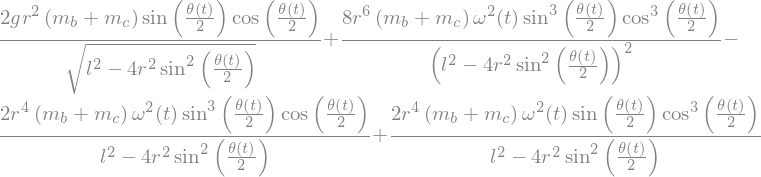

In [28]:
g = f.subs({omega.diff(t): 0})
g

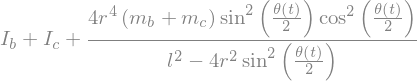

In [29]:
I_sys = f.coeff(omega.diff(t))
I_sys

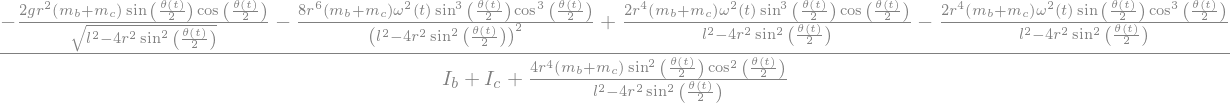

In [30]:
omegadot = -g/I_sys
omegadot

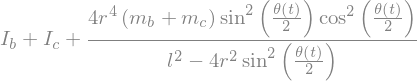

In [31]:
f.diff(omega.diff(t))

In [32]:
from resonance.nonlinear_systems import SingleDoFNonLinearSystem
import numpy as np

In [33]:
sys = SingleDoFNonLinearSystem()

In [34]:
sys.constants['m_b'] = 1  # kg
sys.constants['m_c'] = 2.6  # kg
sys.constants['r'] = 0.3  # m
sys.constants['l'] = 0.75  # m
sys.constants['g'] = 9.81  # m/s**2
sys.constants['I_b'] = 1.0*0.3**2  # kg m**2
sys.constants['I_c'] = 2.6*0.3**2  # kg m**2

In [35]:
sys.constants

{'m_b': 1,
 'm_c': 2.6,
 'r': 0.3,
 'l': 0.75,
 'g': 9.81,
 'I_b': 0.09,
 'I_c': 0.23399999999999999}

In [36]:
sys.coordinates['theta'] = np.deg2rad(10.0)  # rad
sys.speeds['omega'] = 0.0

In [37]:
str(omegadot).replace('(t)', '').replace('sin(', 'np.sin(').replace('cos(', 'np.cos(')

'(-2*g*r**2*(m_b + m_c)*np.sin(theta/2)*np.cos(theta/2)/sqrt(l**2 - 4*r**2*np.sin(theta/2)**2) - 8*r**6*(m_b + m_c)*omega**2*np.sin(theta/2)**3*np.cos(theta/2)**3/(l**2 - 4*r**2*np.sin(theta/2)**2)**2 + 2*r**4*(m_b + m_c)*omega**2*np.sin(theta/2)**3*np.cos(theta/2)/(l**2 - 4*r**2*np.sin(theta/2)**2) - 2*r**4*(m_b + m_c)*omega**2*np.sin(theta/2)*np.cos(theta/2)**3/(l**2 - 4*r**2*np.sin(theta/2)**2))/(I_b + I_c + 4*r**4*(m_b + m_c)*np.sin(theta/2)**2*np.cos(theta/2)**2/(l**2 - 4*r**2*np.sin(theta/2)**2))'

In [38]:
omegadot.free_symbols

In [39]:
sys.states

_StatesDict([('theta', 0.17453292519943295), ('omega', 0.0)])

In [40]:
def calc_derivatives(theta, omega, l, g, r, m_b, m_c, I_b, I_c):
    thetadot = omega
    omegadot = ((-2*g*r**2*(m_b + m_c)*np.sin(theta/2)*np.cos(theta/2)/np.sqrt(l**2 - 4*r**2*np.sin(theta/2)**2) -
                8*r**6*(m_b + m_c)*omega**2*np.sin(theta/2)**3*np.cos(theta/2)**3/(l**2 - 4*r**2*np.sin(theta/2)**2)**2 + 2*r**4*(m_b + m_c)*omega**2*np.sin(theta/2)**3*np.cos(theta/2)/(l**2 - 4*r**2*np.sin(theta/2)**2) - 2*r**4*(m_b + m_c)*omega**2*np.sin(theta/2)*np.cos(theta/2)**3/(l**2 - 4*r**2*np.sin(theta/2)**2))/(I_b + I_c +
                4*r**4*(m_b + m_c)*np.sin(theta/2)**2*np.cos(theta/2)**2/(l**2 - 4*r**2*np.sin(theta/2)**2)))
    return thetadot, omegadot  # order matters here, match sys.states

In [41]:
calc_derivatives(1.0, 2.0, 10.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0)

In [42]:
sys.diff_eq_func = calc_derivatives

In [43]:
traj = sys.free_response(10.0)

In [44]:
%matplotlib widget

In [45]:
traj.plot(subplots=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f928324bd30>,
      dtype=object)

In [46]:
def calc_height(theta, r, l):
    return l - np.sqrt(l**2 - (2*r*np.sin(theta/2))**2)

In [47]:
sys.add_measurement('h', calc_height)

In [48]:
traj = sys.free_response(10.0)

In [49]:
traj

,theta,theta_acc,omega,h
time,,,,
0.00,0.174533,-2.265874,0.000000,0.001825
0.01,0.174420,-2.264439,-0.022654,0.001823
0.02,0.174080,-2.260137,-0.045279,0.001816
0.03,0.173514,-2.252970,-0.067847,0.001804
0.04,0.172723,-2.242947,-0.090329,0.001788
...,...,...,...,...
9.96,-0.032323,0.424660,0.619826,0.000063
9.97,-0.026105,0.343017,0.623665,0.000041
9.98,-0.019852,0.260890,0.626685,0.000024


In [50]:
traj.plot(subplots=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92830ae5f8>,
      dtype=object)

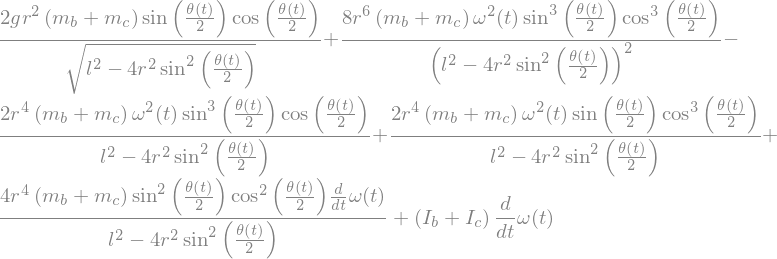

In [51]:
f

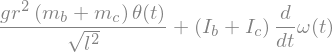

In [52]:
f_lin = f.subs({
 sm.sin(theta/2): theta/2,
 sm.cos(theta/2): 1,
 omega**2: 0,
 theta**2: 0,
})
f_lin

In [53]:
w = sm.symbols('w', real=True, positive=True)

In [54]:
sm.sqrt(w**2)

In [55]:
m = f_lin.coeff(omega.diff(t))
m

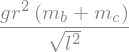

In [56]:
k = f_lin.coeff(theta)
k

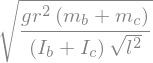

In [57]:
wn = sm.sqrt(k/m)
wn

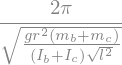

In [58]:
period = 2*sm.pi/wn
period

In [59]:
T = sm.symbols('T')

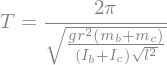

In [60]:
period_eq = sm.Eq(T, period)
period_eq

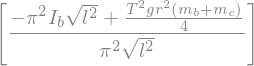

In [61]:
sm.solve(period_eq, Ic)

In [62]:
from resonance.linear_systems import SingleDoFLinearSystem

In [63]:
linsys = SingleDoFLinearSystem()

In [64]:
linsys.constants['m_b'] = 1  # kg
linsys.constants['m_c'] = 2.6  # kg
linsys.constants['r'] = 0.3  # m
linsys.constants['l'] = 0.75  # m
linsys.constants['g'] = 9.81  # m/s**2
linsys.constants['I_b'] = 1.0*0.3**2  # kg m**2
linsys.constants['I_c'] = 2.6*0.3**2  # kg m**2

In [65]:
linsys.coordinates['theta'] = np.deg2rad(10.0)
linsys.speeds['omega'] = 0.0

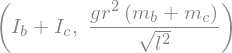

In [66]:
m, k

In [67]:
def calc_coeffs(I_b, I_c, g, r, m_b, m_c, l):
    m = I_b + I_c
    b = 0.0
    k = g*r**2*(m_b+m_c)/l
    
    return m, b, k

In [68]:
linsys.canonical_coeffs_func = calc_coeffs

In [69]:
traj = linsys.free_response(10.0)

In [70]:
traj.plot(subplots=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92832b7c88>,
      dtype=object)

In [71]:
from resonance.linear_systems import SingleDoFLinearSystem as CarModel

In [72]:
sys = CarModel()